In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv(r'C:\Users\vasu2.SIDHU\OneDrive\Desktop\real-estate-app\datasets\clean_data\gurgaon_properties_missing_value_imputation.csv')

In [4]:
df.shape

(3554, 19)

In [5]:
df.head()

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,0,flat,parsvnath green ville,sector 48,1.60,8377.0,3.0,3.0,3,13.0,Old Property,1700.0,0.0,0.0,0.0,0.0,1.0,2.0,119.0
1,1,house,independent,sector 43,8.25,30556.0,5.0,6.0,3+,3.0,Moderately Old,2700.0,1.0,1.0,1.0,1.0,0.0,2.0,64.0
2,3,flat,deepak minda,manesar,1.20,4528.0,3.0,3.0,3+,6.0,Moderately Old,2944.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0
3,4,flat,emaar imperial gardens,sector 102,1.98,9900.0,3.0,3.0,3+,9.0,Relatively New,2222.0,0.0,1.0,0.0,0.0,0.0,2.0,72.0
4,6,flat,sare crescent parc,sector 92,0.49,4910.0,2.0,2.0,2,2.0,Relatively New,1109.0,0.0,0.0,0.0,0.0,0.0,0.0,96.0


In [6]:
latlong = pd.read_csv(r'C:\Users\vasu2.SIDHU\OneDrive\Desktop\real-estate-app\datasets\raw_data\latlong.csv')

In [7]:
latlong

,sector,coordinates
0,sector 1,"28.3663° N, 76.9456° E"
1,sector 2,"28.5095° N, 77.0320° E"
2,sector 3,"28.4909° N, 77.0176° E"
3,sector 4,"28.4738° N, 77.0107° E"
4,sector 5,"28.4794° N, 77.0176° E"
...,...,...
124,sector 113,"28.5287° N, 77.0233° E"
125,sector 114,"28.5334° N, 77.0118° E"
126,sector 115,"28.5385° N, 77.0061° E"
127,gwal pahari,"28.4484° N, 77.0210° E"


In [8]:
latlong['latitude'] = latlong['coordinates'].str.split(',').str.get(0).str.split('°').str.get(0).astype('float')

In [9]:
latlong['longitude'] = latlong['coordinates'].str.split(',').str.get(1).str.split('°').str.get(0).astype('float')

In [10]:
latlong.head()

,sector,coordinates,latitude,longitude
0,sector 1,"28.3663° N, 76.9456° E",28.3663,76.9456
1,sector 2,"28.5095° N, 77.0320° E",28.5095,77.0320
2,sector 3,"28.4909° N, 77.0176° E",28.4909,77.0176
3,sector 4,"28.4738° N, 77.0107° E",28.4738,77.0107
4,sector 5,"28.4794° N, 77.0176° E",28.4794,77.0176


In [11]:
new_df = df.merge(latlong, on='sector')

In [12]:
new_df.columns

Index(['Unnamed: 0', 'property_type', 'society', 'sector', 'price',
       'price_per_sqft', 'bedRoom', 'bathroom', 'balcony', 'floorNum',
       'agePossession', 'built_up_area', 'study room', 'servant room',
       'store room', 'pooja room', 'others', 'furnishing_type', 'luxury_score',
       'coordinates', 'latitude', 'longitude'],
      dtype='object')

In [13]:

group_df = new_df.groupby('sector').mean(numeric_only=True)[['price', 'price_per_sqft', 'built_up_area', 'latitude', 'longitude']]

In [14]:
group_df

,price,price_per_sqft,built_up_area,latitude,longitude
sector,,,,,
gwal pahari,3.192222,9585.777778,3056.166667,28.4484,77.0210
manesar,0.962258,4608.064516,2027.367742,28.3515,76.9428
sector 1,1.860000,8249.833333,2327.833333,28.3663,76.9456
sector 102,1.698962,10457.811321,1558.547170,28.4750,76.9715
sector 103,1.495000,7445.785714,1865.428571,28.4949,76.9845
...,...,...,...,...,...
sector 92,0.933333,5948.404040,1566.123030,28.4079,76.9153
sector 93,0.848889,8009.888889,1017.000000,28.4153,76.9326
sector 95,0.466780,5174.169492,5882.406780,28.4172,76.9081


In [15]:
fig = px.scatter_map(group_df, lat="latitude", lon="longitude", color="price_per_sqft", size='built_up_area',
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=10,
                  map_style="open-street-map",text=group_df.index)
fig.show()

In [16]:
new_df.to_csv('data_viz1.csv',index=False)

In [17]:
df1 = pd.read_csv(r'C:\Users\vasu2.SIDHU\OneDrive\Desktop\real-estate-app\datasets\clean_data\gurgaon_properties.csv')

In [18]:
df1.head()

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,3 BHK Flat in Sector 48 Gurgaon,flat,parsvnath green ville,1.60,8376.0,1910.0,Super Built up area 1910(177.44 sq.m.)Built Up...,3,3,3,others,"Sector 48 Gurgaon, Gurgaon, Haryana",13.0,North-West,10+ Year Old,"['Sri Radhe Krishna Temple', 'Icici bank ATM',...",This lovely 3 bhk apartment/flat in sector 48 ...,"['3 Wardrobe', '1 Water Purifier', '6 Fan', '1...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...","['Green Area4 out of 5', 'Construction4 out of..."
1,5 Bedroom House for sale in B Block Sushant Lo...,house,independent,8.25,30556.0,2700.0,Plot area 300(250.84 sq.m.),5,6,3+,"study room,servant room,store room,pooja room","Sushant Lok, B Block Sushant Lok Phase 1, Gurg...",3.0,West,5 to 10 Year Old,"['Iffco chowk metro station', 'Huda city centr...",Well maintained kothi very well lacated gated ...,"['5 Wardrobe', '10 Fan', '1 Exhaust Fan', '5 G...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment4 out of 5', 'Lifestyle4.5 out of..."
2,3 BHK Flat in Sector 69 Gurgaon,flat,tulip violet,1.65,8872.0,1860.0,Built Up area: 1578 (146.6 sq.m.),3,3,2,not available,"Sector 69 Gurgaon, Gurgaon, Haryana",1.0,NaN,1 to 5 Year Old,"['Sri Radhe Krishna Temple', 'Icici bank ATM',...","3 bath, semi-Furnished, 1st floor (Of 18), ove...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '2 Ge...","['Security / Fire Alarm', 'Intercom Facility',...","['Environment4 out of 5', 'Lifestyle4 out of 5..."
3,3 BHK Flat in Sector 1A IMT Manesar,flat,deepak minda,1.20,4528.0,2650.0,Carpet area: 2650 (246.19 sq.m.),3,3,3+,servant room,"Sector 1A IMT Manesar, Gurgaon, Haryana",6.0,North-West,5 to 10 Year Old,"['Pooja Clinic', 'Dr. Sahil Clinic', 'Prakash ...",Deepak minda sec-1 imt manesar...................,"['7 Fan', '7 Light', 'No AC', 'No Bed', 'No Ch...","['Piped-gas', 'Rain Water Harvesting']",NaN
4,3 BHK Flat in Sector 102 Gurgaon,flat,emaar imperial gardens,1.98,9900.0,2000.0,Carpet area: 2000 (185.81 sq.m.),3,3,3+,servant room,"Sector 102 Gurgaon, Gurgaon, Haryana",9.0,North,1 to 5 Year Old,"['Satya The Hive Mall', 'Gurugram Road', 'Dwar...","This is on dwarika express highway , the locat...","['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '3 Ge...","['Feng Shui / Vaastu Compliant', 'Intercom Fac...","['Green Area5 out of 5', 'Construction4 out of..."


In [19]:
wordcloud_df = df1.merge(df, left_index=True, right_index=True)[['features','sector']]

In [20]:
wordcloud_df.head()

,features,sector
0,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...",sector 48
1,"['Feng Shui / Vaastu Compliant', 'Private Gard...",sector 43
2,"['Security / Fire Alarm', 'Intercom Facility',...",manesar
3,"['Piped-gas', 'Rain Water Harvesting']",sector 102
4,"['Feng Shui / Vaastu Compliant', 'Intercom Fac...",sector 92


In [21]:
import ast
main = []
for item in wordcloud_df['features'].dropna().apply(ast.literal_eval):
    main.extend(item)

In [22]:
main

['Security / Fire Alarm',
 'Feng Shui / Vaastu Compliant',
 'Intercom Facility',
 'Lift(s)',
 'Maintenance Staff',
 'Water Storage',
 'Separate entry for servant room',
 'No open drainage around',
 'Bank Attached Property',
 'Visitor Parking',
 'Swimming Pool',
 'Park',
 'Natural Light',
 'Airy Rooms',
 'Spacious Interiors',
 'Low Density Society',
 'Shopping Centre',
 'Fitness Centre / GYM',
 'Waste Disposal',
 'Rain Water Harvesting',
 'Club house / Community Center',
 'Feng Shui / Vaastu Compliant',
 'Private Garden / Terrace',
 'High Ceiling Height',
 'False Ceiling Lighting',
 'Water Storage',
 'Separate entry for servant room',
 'No open drainage around',
 'Visitor Parking',
 'Low Density Society',
 'Waste Disposal',
 'Rain Water Harvesting',
 'Security / Fire Alarm',
 'Intercom Facility',
 'Lift(s)',
 'Maintenance Staff',
 'No open drainage around',
 'Piped-gas',
 'Swimming Pool',
 'Park',
 'Security Personnel',
 'Internet/wi-fi connectivity',
 'Shopping Centre',
 'Fitness Centr

In [23]:
from wordcloud import WordCloud

In [24]:
feature_text = ' '.join(main)

In [25]:
import pickle
pickle.dump(feature_text, open('feature_text.pkl','wb'))

In [26]:
feature_text

'Security / Fire Alarm Feng Shui / Vaastu Compliant Intercom Facility Lift(s) Maintenance Staff Water Storage Separate entry for servant room No open drainage around Bank Attached Property Visitor Parking Swimming Pool Park Natural Light Airy Rooms Spacious Interiors Low Density Society Shopping Centre Fitness Centre / GYM Waste Disposal Rain Water Harvesting Club house / Community Center Feng Shui / Vaastu Compliant Private Garden / Terrace High Ceiling Height False Ceiling Lighting Water Storage Separate entry for servant room No open drainage around Visitor Parking Low Density Society Waste Disposal Rain Water Harvesting Security / Fire Alarm Intercom Facility Lift(s) Maintenance Staff No open drainage around Piped-gas Swimming Pool Park Security Personnel Internet/wi-fi connectivity Shopping Centre Fitness Centre / GYM Waste Disposal Club house / Community Center Piped-gas Rain Water Harvesting Feng Shui / Vaastu Compliant Intercom Facility Lift(s) Maintenance Staff Swimming Pool P

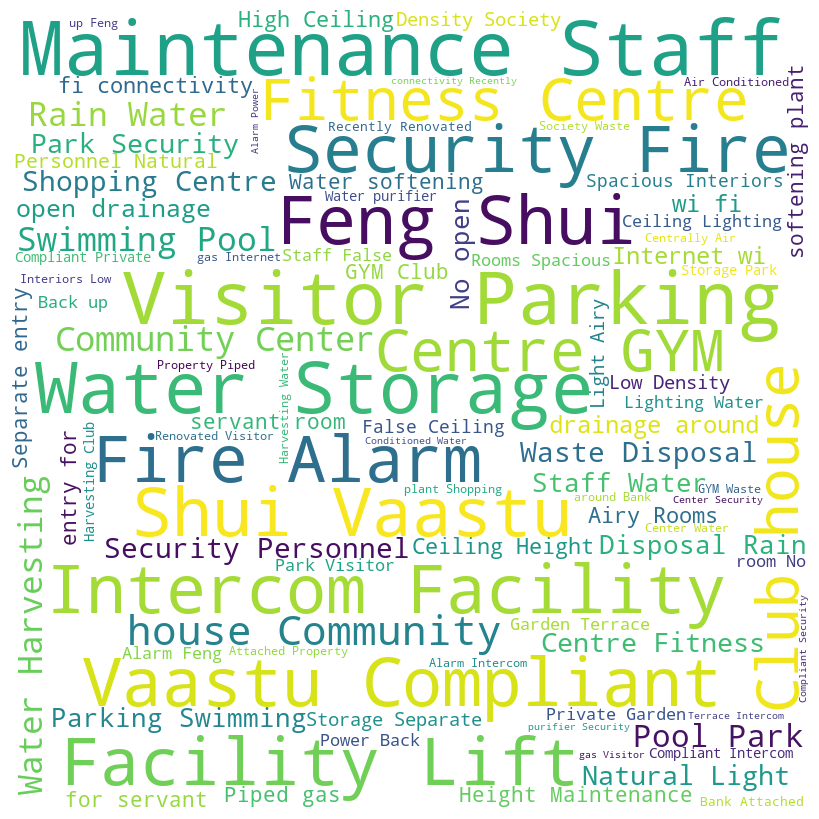

In [27]:

plt.rcParams["font.family"] = "Arial"

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      stopwords = set(['s']),  # Any stopwords you'd like to exclude
                      min_font_size = 10).generate(feature_text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() # st.pyplot()

In [100]:
data = dict(
    names=["A", "B", "C", "D", "E", "F"],
    parents=["", "", "", "A", "A", "C"],
    values=[10, 20, 30, 40, 50, 60],
)

fig = px.sunburst(
    df1,
    names='property_type',
    values='price_per_sqft',
    parents='bedRoom',
    title="Sample Sunburst Chart"
)
fig.show()

In [28]:
fig = px.scatter(df, x="built_up_area", y="price", color="bedRoom", title="Area Vs Price")

# Show the plot
fig.show()

In [29]:
fig = px.pie(df, names='bedRoom', title='Total Bill Amount by Day')

# Show the plot
fig.show()

In [109]:
temp_df = df[df['bedRoom'] <= 4]
# Create side-by-side boxplots of the total bill amounts by day
fig = px.box(temp_df, x='bedRoom', y='price', title='BHK Price Range')

# Show the plot
fig.show()


C:\Users\vasu2.SIDHU\AppData\Local\Temp\ipykernel_40816\3761596323.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\vasu2.SIDHU\AppData\Local\Temp\ipykernel_40816\3761596323.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='price', ylabel='Density'>

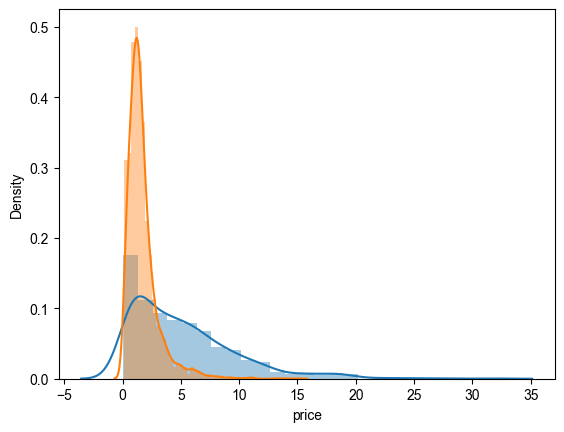

In [30]:
sns.distplot(df[df['property_type'] == 'house']['price'])
sns.distplot(df[df['property_type'] == 'flat']['price'])

In [31]:
new_df['sector'].unique().tolist().insert(0,'overall')